<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E7%B0%A1%E5%96%AE%E7%B7%9A%E6%80%A7%E8%BF%B4%E6%AD%B8/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=c25f3b115394b5df0eef5eae9e56429ba780c9dd8660841ceff0fff3c6b49405
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [2]:
#下載檔案
import wget
wget.download('https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/Salary_Data.csv')
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")


'ChineseFont.ttf'

In [3]:
import pandas as pd

url = "Salary_Data.csv"
data = pd.read_csv(url)

x = data["YearsExperience"]
y = data["Salary"]

In [5]:
#計算w=10,b=10的w方向和b方向的斜率
w = 10
b = 10
n = len(x)
w_gradient = (2*x*(w*x+b -y)).sum()/n
b_gradient = (2*(w*x+b -y)).sum()/n
w_gradient, b_gradient

(np.float64(-118.41393939393939), np.float64(-27.46666666666667))

In [7]:
#建立function,計算w方向和b方向的斜率

def compute_gradient(x, y, w, b):
  #w_gradient = (2*x*(w*x+b -y)).mean() #乘2是可以省略,會將學習率*2
  w_gradient = (x*(w*x+b -y)).mean()
  #b_gradient = (2*w*x+b -y).mean() #乘2是可以省略,會將學習率*2
  b_gradient = (w*x+b -y).mean()
  return w_gradient, b_gradient

In [8]:
#測試
compute_gradient(x, y, 10, 10)

(np.float64(-59.20696969696969), np.float64(-13.733333333333334))

In [9]:
#w=0,b=0,learning_rate=0.001,重新計算新的w和b
w = 0
b = 0
learning_rate = 0.001
w_gradient, b_gradient = compute_gradient(x, y, w, b)

w = w - w_gradient * learning_rate
b = b - b_gradient * learning_rate

w, b

(np.float64(0.43577969696969693), np.float64(0.07255151515151516))

In [10]:
#計算cost function
def compute_cost(x, y, w, b):
  y_pred = w*x + b
  cost = (y - y_pred)**2
  cost = cost.sum() / len(x)
  return cost

In [11]:
#w=0,b=0,learning_rate=0.001,重新計算w和b
#檢查w=0,b=0,和重新計算的w和b,會讓cost下降

w = 0
b = 0
learning_rate = 0.001
w_gradient, b_gradient = compute_gradient(x, y, w, b)
print(compute_cost(x, y, w, b))#w=0,b=0的cost

w = w - w_gradient * learning_rate
b = b - b_gradient * learning_rate
print(compute_cost(x, y, w, b))#重新計算的w和b的cost

#檢查的結果是有下降的

6040.596363636363
5656.799173956598


In [12]:
#w=0,b=0,learning_rate=0.001,重新計算w和b
#檢查w=0,b=0,和重新計算的w和b,會讓cost下降
#更新10次

#w=0,b=0,learning_rate=0.001,重新計算w和b
#檢查w=0,b=0,和重新計算的w和b,會讓cost下降

w = 0
b = 0
learning_rate = 0.001
for i in range(10):
    w_gradient, b_gradient = compute_gradient(x, y, w, b)
    w = w - w_gradient * learning_rate
    b = b - b_gradient * learning_rate
    cost = compute_cost(x, y, w, b)
    print(f'Iteration{i}, Cost:{cost:.2f}, w:{w:.2f}, b:{b:.2f}')#重新計算的w和b的cost

#檢查cost是否有下降

Iteration0, Cost:5656.80, w:0.44, b:0.07
Iteration1, Cost:5298.29, w:0.86, b:0.14
Iteration2, Cost:4963.39, w:1.26, b:0.21
Iteration3, Cost:4650.55, w:1.66, b:0.28
Iteration4, Cost:4358.33, w:2.04, b:0.34
Iteration5, Cost:4085.35, w:2.40, b:0.40
Iteration6, Cost:3830.35, w:2.76, b:0.46
Iteration7, Cost:3592.15, w:3.10, b:0.52
Iteration8, Cost:3369.64, w:3.43, b:0.58
Iteration9, Cost:3161.79, w:3.75, b:0.63


In [14]:
#w=0,b=0,learning_rate=0.001,重新計算w和b
#檢查w=0,b=0,和重新計算的w和b,會讓cost下降
#更新20次

#w=0,b=0,learning_rate=0.001,重新計算w和b
#檢查w=0,b=0,和重新計算的w和b,會讓cost下降

w = 0
b = 0
learning_rate = 0.001
for i in range(20):
    w_gradient, b_gradient = compute_gradient(x, y, w, b)
    w = w - w_gradient * learning_rate
    b = b - b_gradient * learning_rate
    cost = compute_cost(x, y, w, b)
    print(f'Iteration{i:5}, Cost:{cost:.2e}, w:{w:.2e}, b:{b:.2e}, w_gradient:{w_gradient:.2e}, b_gradient:{b_gradient:.2e}')#列印出w,b,cost,w_gradient,b_gradient

#檢查cost是否有下降

Iteration    0, Cost:5.66e+03, w:4.36e-01, b:7.26e-02, w_gradient:-4.36e+02, b_gradient:-7.26e+01
Iteration    1, Cost:5.30e+03, w:8.57e-01, b:1.43e-01, w_gradient:-4.21e+02, b_gradient:-7.04e+01
Iteration    2, Cost:4.96e+03, w:1.26e+00, b:2.11e-01, w_gradient:-4.07e+02, b_gradient:-6.82e+01
Iteration    3, Cost:4.65e+03, w:1.66e+00, b:2.77e-01, w_gradient:-3.93e+02, b_gradient:-6.62e+01
Iteration    4, Cost:4.36e+03, w:2.04e+00, b:3.41e-01, w_gradient:-3.80e+02, b_gradient:-6.42e+01
Iteration    5, Cost:4.09e+03, w:2.40e+00, b:4.04e-01, w_gradient:-3.67e+02, b_gradient:-6.23e+01
Iteration    6, Cost:3.83e+03, w:2.76e+00, b:4.64e-01, w_gradient:-3.55e+02, b_gradient:-6.04e+01
Iteration    7, Cost:3.59e+03, w:3.10e+00, b:5.23e-01, w_gradient:-3.43e+02, b_gradient:-5.86e+01
Iteration    8, Cost:3.37e+03, w:3.43e+00, b:5.80e-01, w_gradient:-3.32e+02, b_gradient:-5.69e+01
Iteration    9, Cost:3.16e+03, w:3.75e+00, b:6.35e-01, w_gradient:-3.20e+02, b_gradient:-5.52e+01
Iteration   10, Cost

In [15]:
#w=0,b=0,learning_rate=0.001,重新計算w和b
#檢查w=0,b=0,和重新計算的w和b,會讓cost下降
#更新10000次,每1000次列印1次


w = 0
b = 0
learning_rate = 0.001
for i in range(10000):
    w_gradient, b_gradient = compute_gradient(x, y, w, b)
    w = w - w_gradient * learning_rate
    b = b - b_gradient * learning_rate
    cost = compute_cost(x, y, w, b)
    if i%1000 == 0:
        print(f'Iteration{i:5}, Cost:{cost: .2e}, w:{w: .2e}, b:{b: .2e}, w_gradient:{w_gradient: .2e}, b_gradient:{b_gradient: .2e}')#列印出w,b,cost,w_gradient,b_gradient

#檢查cost是否有下降

Iteration    0, Cost: 5.66e+03, w: 4.36e-01, b: 7.26e-02, w_gradient:-4.36e+02, b_gradient:-7.26e+01
Iteration 1000, Cost: 1.41e+02, w: 1.21e+01, b: 8.07e+00, w_gradient: 8.00e-01, b_gradient:-5.32e+00
Iteration 2000, Cost: 9.61e+01, w: 1.14e+01, b: 1.27e+01, w_gradient: 6.12e-01, b_gradient:-4.08e+00
Iteration 3000, Cost: 6.97e+01, w: 1.09e+01, b: 1.63e+01, w_gradient: 4.69e-01, b_gradient:-3.12e+00
Iteration 4000, Cost: 5.43e+01, w: 1.05e+01, b: 1.91e+01, w_gradient: 3.59e-01, b_gradient:-2.39e+00
Iteration 5000, Cost: 4.52e+01, w: 1.02e+01, b: 2.12e+01, w_gradient: 2.75e-01, b_gradient:-1.83e+00
Iteration 6000, Cost: 3.99e+01, w: 9.91e+00, b: 2.28e+01, w_gradient: 2.10e-01, b_gradient:-1.40e+00
Iteration 7000, Cost: 3.68e+01, w: 9.73e+00, b: 2.40e+01, w_gradient: 1.61e-01, b_gradient:-1.07e+00
Iteration 8000, Cost: 3.50e+01, w: 9.59e+00, b: 2.49e+01, w_gradient: 1.23e-01, b_gradient:-8.22e-01
Iteration 9000, Cost: 3.39e+01, w: 9.48e+00, b: 2.57e+01, w_gradient: 9.45e-02, b_gradient:

In [16]:
#w=0,b=0,learning_rate=0.001,重新計算w和b
#檢查w=0,b=0,和重新計算的w和b,會讓cost下降
#更新20000次,每1000次列印1次


w = 0
b = 0
learning_rate = 0.001
for i in range(20000):
    w_gradient, b_gradient = compute_gradient(x, y, w, b)
    w = w - w_gradient * learning_rate
    b = b - b_gradient * learning_rate
    cost = compute_cost(x, y, w, b)
    if i%1000 == 0:
        print(f'Iteration{i:5}, Cost:{cost: .4e}, w:{w: .2e}, b:{b: .2e}, w_gradient:{w_gradient: .2e}, b_gradient:{b_gradient: .2e}')#列印出w,b,cost,w_gradient,b_gradient

#檢查cost是否有下降


Iteration    0, Cost: 5.6568e+03, w: 4.36e-01, b: 7.26e-02, w_gradient:-4.36e+02, b_gradient:-7.26e+01
Iteration 1000, Cost: 1.4097e+02, w: 1.21e+01, b: 8.07e+00, w_gradient: 8.00e-01, b_gradient:-5.32e+00
Iteration 2000, Cost: 9.6063e+01, w: 1.14e+01, b: 1.27e+01, w_gradient: 6.12e-01, b_gradient:-4.08e+00
Iteration 3000, Cost: 6.9732e+01, w: 1.09e+01, b: 1.63e+01, w_gradient: 4.69e-01, b_gradient:-3.12e+00
Iteration 4000, Cost: 5.4293e+01, w: 1.05e+01, b: 1.91e+01, w_gradient: 3.59e-01, b_gradient:-2.39e+00
Iteration 5000, Cost: 4.5241e+01, w: 1.02e+01, b: 2.12e+01, w_gradient: 2.75e-01, b_gradient:-1.83e+00
Iteration 6000, Cost: 3.9933e+01, w: 9.91e+00, b: 2.28e+01, w_gradient: 2.10e-01, b_gradient:-1.40e+00
Iteration 7000, Cost: 3.6821e+01, w: 9.73e+00, b: 2.40e+01, w_gradient: 1.61e-01, b_gradient:-1.07e+00
Iteration 8000, Cost: 3.4996e+01, w: 9.59e+00, b: 2.49e+01, w_gradient: 1.23e-01, b_gradient:-8.22e-01
Iteration 9000, Cost: 3.3926e+01, w: 9.48e+00, b: 2.57e+01, w_gradient: 9

In [17]:
#將梯度下降方式寫成function
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter=1000):
  c_hist = [] #收集所有的cost
  w_hist = [] #收集所有的w
  b_hist = [] #收集所有的b

  w = w_init
  b = b_init

  for i in range(run_iter):
    w_gradient, b_gradient = gradient_function(x, y, w, b)
    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    cost = cost_function(x, y, w, b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)

    if i%p_iter == 0:
      print(f"Iteration {i:5} : Cost {cost: .4e}, w: {w: .2e}, b: {b: .2e}, w_gradient: {w_gradient: .2e}, b_gradient: {b_gradient: .2e}")

  return w, b, w_hist, b_hist, c_hist

In [18]:
#執行梯度下降的function,20000次,學習率=0.001
w_init = 0
b_init = 0
learning_rate = 1.0e-3
run_iter = 20000

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x, y, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)
#列印出最終的w和b值
print(f"最終的w={w_final:.2f},b={b_final:.2f}")

Iteration     0 : Cost  5.6568e+03, w:  4.36e-01, b:  7.26e-02, w_gradient: -4.36e+02, b_gradient: -7.26e+01
Iteration  1000 : Cost  1.4097e+02, w:  1.21e+01, b:  8.07e+00, w_gradient:  8.00e-01, b_gradient: -5.32e+00
Iteration  2000 : Cost  9.6063e+01, w:  1.14e+01, b:  1.27e+01, w_gradient:  6.12e-01, b_gradient: -4.08e+00
Iteration  3000 : Cost  6.9732e+01, w:  1.09e+01, b:  1.63e+01, w_gradient:  4.69e-01, b_gradient: -3.12e+00
Iteration  4000 : Cost  5.4293e+01, w:  1.05e+01, b:  1.91e+01, w_gradient:  3.59e-01, b_gradient: -2.39e+00
Iteration  5000 : Cost  4.5241e+01, w:  1.02e+01, b:  2.12e+01, w_gradient:  2.75e-01, b_gradient: -1.83e+00
Iteration  6000 : Cost  3.9933e+01, w:  9.91e+00, b:  2.28e+01, w_gradient:  2.10e-01, b_gradient: -1.40e+00
Iteration  7000 : Cost  3.6821e+01, w:  9.73e+00, b:  2.40e+01, w_gradient:  1.61e-01, b_gradient: -1.07e+00
Iteration  8000 : Cost  3.4996e+01, w:  9.59e+00, b:  2.49e+01, w_gradient:  1.23e-01, b_gradient: -8.22e-01
Iteration  9000 : C

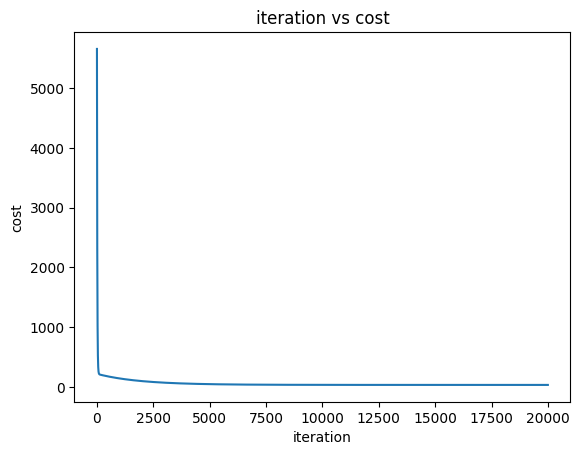

In [19]:
#建立圖表,檢示iteration和cost之間的關係
#顯示20000次的圖表
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0,20000), c_hist)
plt.title("iteration vs cost")
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

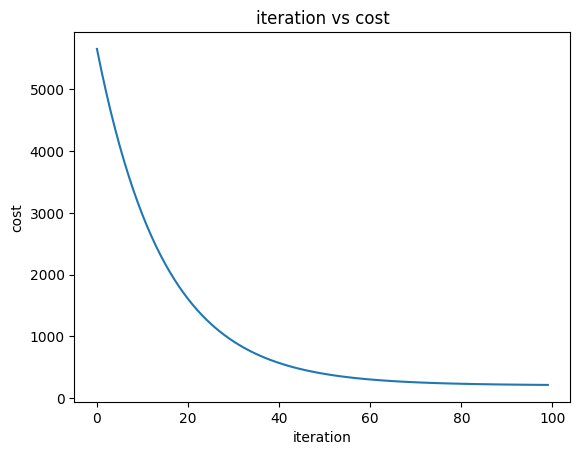

In [20]:
#建立圖表,檢示iteration和cost之間的關係
#顯示前100次
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0, 100), c_hist[:100])
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()


In [21]:
print(f"最終w b=({w_final:.2f}, {b_final:.2f})")

最終w b=(9.14, 27.89)


In [22]:
print(f"年資3.5  預測薪水:{w_final*3.5 + b_final:.1f}K")
print(f"年資5.9  預測薪水:{w_final*5.9 + b_final:.1f}K")

年資3.5  預測薪水:59.9K
年資5.9  預測薪水:81.8K


In [23]:
ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i,j] = cost
    j = j+1
  i = i+1

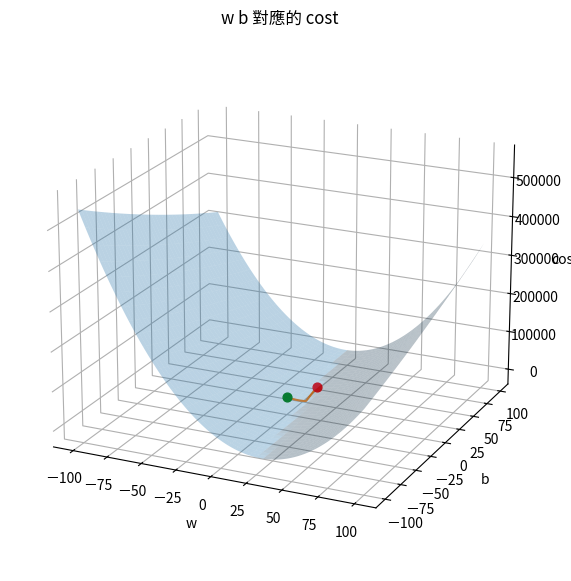

In [24]:
#建立3D圖
#取得所有計算梯度下降的路徑
#綠色點為起點
#紅色點為終點
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.view_init(20, -65)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0))

b_grid, w_grid = np.meshgrid(bs, ws)
# https://wangyeming.github.io/2018/11/12/numpy-meshgrid/

ax.plot_surface(w_grid, b_grid, costs, alpha=0.3)

ax.set_title("w b 對應的 cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)
ax.scatter(w_hist[0], b_hist[0], c_hist[0], color="green", s=40)
ax.plot(w_hist, b_hist, c_hist)

plt.show()

### 不同的w初始值,b的初始值,不同的學習率,不同的次數所得到的3d圖表

In [25]:
w_init = -100
b_init = -100
learning_rate = 1.0e-3
run_iter = 20000

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x, y, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)
#列印出最終的w和b值
print(f"最終的w={w_final:.2f},b={b_final:.2f}")

Iteration     0 : Cost  5.0753e+05, w: -9.58e+01, b: -9.93e+01, w_gradient: -4.20e+03, b_gradient: -6.61e+02
Iteration  1000 : Cost  1.9382e+03, w:  2.17e+01, b: -5.56e+01, w_gradient:  3.35e+00, b_gradient: -2.23e+01
Iteration  2000 : Cost  1.1499e+03, w:  1.87e+01, b: -3.60e+01, w_gradient:  2.57e+00, b_gradient: -1.71e+01
Iteration  3000 : Cost  6.8762e+02, w:  1.65e+01, b: -2.10e+01, w_gradient:  1.96e+00, b_gradient: -1.31e+01
Iteration  4000 : Cost  4.1658e+02, w:  1.48e+01, b: -9.51e+00, w_gradient:  1.50e+00, b_gradient: -1.00e+01
Iteration  5000 : Cost  2.5766e+02, w:  1.34e+01, b: -7.18e-01, w_gradient:  1.15e+00, b_gradient: -7.67e+00
Iteration  6000 : Cost  1.6448e+02, w:  1.24e+01, b:  6.01e+00, w_gradient:  8.82e-01, b_gradient: -5.87e+00
Iteration  7000 : Cost  1.0985e+02, w:  1.17e+01, b:  1.12e+01, w_gradient:  6.75e-01, b_gradient: -4.50e+00
Iteration  8000 : Cost  7.7815e+01, w:  1.11e+01, b:  1.51e+01, w_gradient:  5.17e-01, b_gradient: -3.44e+00
Iteration  9000 : C

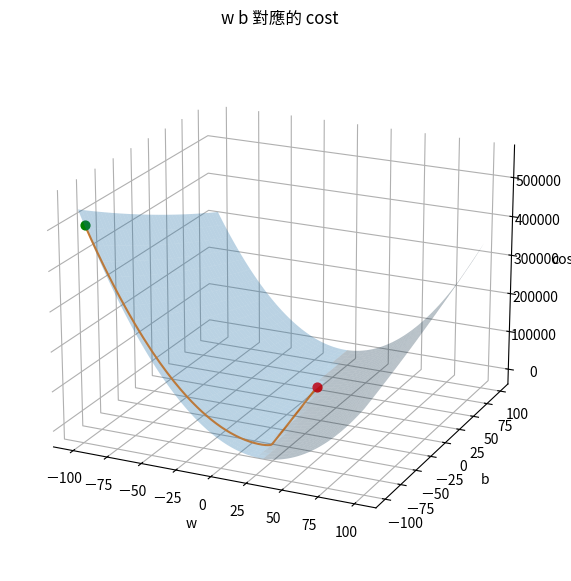

In [26]:
#建立3D圖
#取得所有計算梯度下降的路徑
#綠色點為起點
#紅色點為終點
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.view_init(20, -65)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0))

b_grid, w_grid = np.meshgrid(bs, ws)
# https://wangyeming.github.io/2018/11/12/numpy-meshgrid/

ax.plot_surface(w_grid, b_grid, costs, alpha=0.3)

ax.set_title("w b 對應的 cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)
ax.scatter(w_hist[0], b_hist[0], c_hist[0], color="green", s=40)
ax.plot(w_hist, b_hist, c_hist)

plt.show()